In [ ]:
'''
Project : NLP classification 

Link to project site: https://thecleverprogrammer.com/2021/12/06/omicron-sentiment-analysis-using-python/

There are 17k rows of tweet data about Omicron. I used NLP techniques in the class
we learnt to classify tweets which are positive, negative or neutral about Omicron.
Success rate is above %90 percent.

I used 2k rows of data, because when I apply NLP techniques such as
root finding, autocorrection of spelling mistakes, and removing prefixes/suffixes
it gets very slow. I tried to parallize the function I wrote but it gave
an error. That`s why I used 2k rows 
'''

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('omicron.csv')
df = df.sample(2000)

In [3]:
# EDA

In [4]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
7698,1494895770637590529,Economic Times,NaN,India's No. 1 Business Daily that brings you t...,2009-05-13 12:54:58,4131360,45,417,True,2022-02-19 04:45:00,#LeadStoryOnET | Government on high alert afte...,"['LeadStoryOnET', 'Delta', 'Omicron']",TweetDeck,4,10,False
10200,1494307287418097668,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,56,11,818,False,2022-02-17 13:46:34,7 Day US Covid Deaths by County For RI 2022...,NaN,smcapplication,1,1,False
12501,1496530724207403011,Grunberg and Co,"London, England",Financial Therapists and Business Challengers....,2009-03-23 13:21:03,255,55,53,False,2022-02-23 17:01:43,Retailer @ted_baker is to go ahead with its pl...,['sales'],Hootsuite Inc.,0,1,False
5109,1493316551180574721,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,56,11,812,False,2022-02-14 20:09:44,7 Day Covid Deaths per 1K Population by County...,NaN,smcapplication,1,1,False
16443,1500122679277670402,PIB in Maharashtra 🇮🇳,"Mumbai, India",Zonal Office of Press Information Bureau @PIB_...,2011-06-02 08:39:48,67346,612,2744,True,2022-03-05 14:54:52,#Maharashtra #COVID19 Updates for today\n\n*⃣ ...,"['Maharashtra', 'COVID19', 'OmicronVariant']",Twitter Web App,2,4,False


In [5]:
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
11919,1496753475547373571,The Korea Times,"Seoul, Korea",코리아타임스- Since 1950 Korea's First English Daily...,2012-04-13 06:11:41,35841,34,330,True,2022-02-24 07:46:51,Many #parents who are faced with the decision ...,"['parents', 'vaccinate', 'children']",Twitter Web App,4,7,False
11234,1497119439757664260,Medical Independent,"Dublin, Ireland",Investigative and breaking news source for hea...,2010-07-08 11:43:51,12802,3108,3069,False,2022-02-25 08:01:04,Pandemic showed importance of ‘devolving’ auth...,NaN,Hootsuite Inc.,0,1,False
8989,1494533113292079108,genereaux2019,NaN,We are fighting for the soul of our nation. Ti...,2019-08-10 14:47:07,760,1059,143435,False,2022-02-18 04:43:55,@Elex_Michaelson @GavinNewsom @CAgovernor New ...,"['Omicron', 'COVID19']",Twitter for iPad,0,0,False
7167,1493915912780619778,Tomthunkit™,In Your Mind Now,Tomthunkit's Mind Diner is open 24/7. All-you-...,2011-04-28 01:56:15,90349,71424,29951,False,2022-02-16 11:51:23,DON’T SURRENDER TO #OMICRON\nJust bc you belie...,['OMICRON'],The Social Jukebox,1,1,False
1132,1491671428105601027,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 07:12:37,Total Confirmed Covid Cases by County For KY ...,NaN,smcapplication,1,1,False


In [6]:
# kucuk harfe donustur
df["text"]=df["text"].str.lower()
# noktalama isaretlerini kaldirma
df["text"]=df["text"].str.replace("[^\w\s]","") 
# rakamlari kaldir
df["text"]=df["text"].str.replace("\d+","") 
# \newline ve enter\r kaldir
df["text"]=df["text"].str.replace("\n"," ").replace("\r","") 
# fazladan bosluklari azalt
df["text"]=df["text"].str.replace("  "," ")

C:\Users\haluk\AppData\Local\Temp\ipykernel_13780\4175208248.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"]=df["text"].str.replace("[^\w\s]","")
C:\Users\haluk\AppData\Local\Temp\ipykernel_13780\4175208248.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"]=df["text"].str.replace("\d+","")


In [7]:
df.isnull().sum()

id                    0
user_name             0
user_location       433
user_description    150
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            800
source                0
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [8]:
# strip out html tags
import html
def del_html(text):
   return html.unescape(text)

# Apply to multiple columns
df['text'] = df['text'].apply(del_html)

In [10]:
# FIND ROOTS, REMOVE PREFIXES, CORRECT SPELLING MISTAKES

In [11]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
import re
from multiprocessing import Pool
import multiprocessing as mp

import concurrent.futures

def find_word_roots(text):
    
    spell = Speller(lang='en')
    
    # correct text
    #text = spell(text)
    pr = PorterStemmer()
    lm = WordNetLemmatizer()
    
    # find roots
    words = text.split(" ");
    kokler = [pr.stem(word) for word in words]
    
    #remove prefixes 
    kokler_k = [];
    for kok in kokler :
        kok=spell(kok)
        kokler_k.append( lm.lemmatize(kok,pos = 'v') )
        
    #remove     
    
    ret_str = "";
    for kok in kokler_k :
        ret_str = ret_str +" "+kok
        
    # remove https part
    ret_str =re.sub(r'https?\S+', '', ret_str)    
    print(ret_str)    
    return ret_str

#num_processes = mp.cpu_count()*1;
#num_processes = 1;
#with Pool(num_processes) as pool:
#    # Use the Pool's map function to apply your function to the column
#    results = pool.map(find_word_roots, df['text'])

# Add the results as a new column in your DataFrame
#df['textt'] = results


#with concurrent.futures.ProcessPoolExecutor() as executor:
#    results = list(executor.map(find_word_roots, df['text']))

df['text'] = df['text'].apply(find_word_roots)    

 leadstoryonet govern on high alert after case of mix infect by delta and micro variant show up 
  day us covid death by county for ri   covid insight from our analyst team and usafact 
 retail ted_bak be to go ahead with it plan uk expand despite the per cent drop in sale cap 
  day covid death per k popup by county for nh   covid insight from our analyst team and usa 
 maharashtra covid update for today  new case of omicronvari report from maharashtra today nap 
 nilikm good for you bull be coward you have a ton of support just be care out there you do so m 
 covid covid covid micro be there any more embarrass than a lie be expos the birthplace of 
 haryana govern under the abl leadership of chief minister sh manor lal ha start mani ambition scheme 
 beautifully_m itstatam because south korea be experience record high  number of covid case right now d 
 no case of omicronvari find in the state today the count of micro case stand at of them ca 
 new tv show i think i might like micro 

 micro ba like ba vain induce immune fail then who on thi commoners foramen earth do they still 
 kpc need to know the data to make that deck but there be mani people that be full vaccine and boost 
 dont current to micro just bc you believe it milder amp inherit that you will get it dont give up fight 
 secondary attack rate for sarscov micro and delta variant in norwegian household 
 nbcbayarea note   bahai micro 
 sure enough it wa an invest by an authority organ quit comprehend  covid micro 
  biden extend nation emerge for covid say the tandem continue to cap signify risk to public h 
 effort to limit the effect of micro on safer must be scale up unite agency say health 
 our object be simply spread war on the global vaccine equity crisis edu on the subject address ca 
 huffpost highlight lawrencegostin piece in jamahealthforum on life after covid he discuss how it ma 
 further proof that thing be get more back to normal canada will eas some border require start fe 
 covid case in

 danielgoy liner require what george orwell name as doublethink for capita to oper smoothly 
  new infect amp death report in wednesday discharge still be treat 
  day covid death per k popup by county for fl   covid insight from our analyst team and usa 
  day covid growth in case per k popup by county for id   covid insight from our analyst tea 
 breakingnews on covid micro ba variant rise in the usa  thi thread be show a progress of inch 
 covid micro corona update philippine ph  today gt new case new recovery new death 
 do you know every home in the unite be eli to order free atom covid test the test be 
 _henrikrydberg_ thespybrief well over people each day in the us be still die of covid micro ove 
 keep look at ny as the india for what to come in the us for new casescapita it lead the us if it 
 the truth be fort derrick be the place where the covid origin  covid micro 
  be not enough vaccine effect est against symptoms micro infect be between and aft 
 deltacron new covid var

  new as ive be expect for over a month and as i hint at last week the redblu covid death rate david 
 total covid death distribute by county for nh   covid insight from our analyst team and usafact 
 i must say that covid ha slump me and make me look like a fool i assume micro wa mild but i have the worst kind n
 _curly_ju regardless of micro 
 who drtedro on covid munsecconf today be it end now that one of the major question be ask in 
 alma in the ph every region ha survey unit and they be the one coord the collect but we a 
 all revid base medicine prior to show deficit that mask dont stop the spread of redir 
 us state popup distribute by county for nv   covid insight from our analyst team and isaac 
 covid micro corona update philippine ph  today gt new case new recovery new death 
 hmmmmmmmmmmmm eighteen latin be unplaced southafrica micro 
 lukethedukego storiesofinjuri the universe be make up of space plasma be plasma be cp covid micro 
 who be common gateway assoc preston hav

 usa studi of adult regard shed of viable virus measure by time to culture cover  day ir d 
 the tandem show who social and structure determine of health matter now it time for policeman to a 
 ontario announce end of van passport  napoli ford vaccinepassport covid micro 
  be not enough vaccine effect est against symptoms micro infect be between and aft 
 cnn what a nightmare world be in apocalypse as if the tandem micro ba amp climatecrisi weren enough 
 uk data ad to argument for swift action by andrea pichidi pmi report for the eurozone and the uk highlight 
 growth in d us confirm covid case by county for co   covid insight from our analyst team and us 
 covid micro corona update saudiarabia sa  today gt new case new recovery new death 
 growth in d us confirm covid death by county for ar   covid insight from our analyst team and u 
 indonesia ban entry of foreigntourist through jakarta airport amidst sure micro case indonesia jakarta 
 more sleep in the street of hong kong thi ti

 daily us covid death by county for wa   covid insight from our analyst team and usafact 
  boc the rebound from micro now appear to be well in train household spend be prove result amp sho 
  a reprint assess the perform of rapid antigen test find it be not inferior to the micro variant in 
 the media keep tri to tell us the truth be it ani wonder that some want to call them fake news for fear of wh 
 so happy final after week my daughter and i can final get out of the quarantine i never think that b 
 we need to take risk without take risk you cant get ahead face the challenge smart and brave bc more 
 when your friend make plan to come over due the micro wave 
 gosforth_mummy scullysculli possible although give micro take out kid and teacher from one class in 
  day us covid death by county for nv   covid insight from our analyst team and usafact 
 omicronvari identify a month ago know as ba be not a game changer micro or ba cap mild symptom as doe ba 
 us state popup distribute by 

 jvipondmd essential the govt doesnt care if anyone get micro because for most it mild sure sure some 
 hybrid immune be the immune genre when a person with prior infect receive a vaccine dr henry tell r 
 covid live update actu lawsuit accuse ice jail of den detain vaccine europ china asiapcf 
 micro infect people through the eye  
 today seminar employ town hall italic of the micro variant what next for employ join us at 
 uk variant sequence pmpmagtoday latest sequence feb show micro variant secondgener sub 
 barley bavvari coronavirus be come of cours it be so now they get the new new omicronvari that 
 booster mra vaccines be model effect in prevent covid micro infect for over a month 
 welcome to the next covid micro superspread event at disney park amp resort property where guest stand 
 fort derrick the birthplaceinstitutiontruth afterproblem wa be authority ha come i wa thereof covid 
 warn the micro be evolve rapidly and big pharma be provide opportun for it to do so new york

  student and indian nation from ukraine arxiv in delhi as part of oper manga  
 help last day of payment i need emerge papal hollandfrancehotmailcom airdrop usa newyork 
 ctvottawa it a public health issue they should make the call but they need to not procrastin as micro be f 
 gm coviconenza just leave two be with differ view of the present day each one with their positionpostur 
 break elon musk canada trudeau be hitlerdelet by twitter covid coronavirus covid break 
 never like him anyway dontbeanidiot getvaccinatedandboost wearadamnmask washyourhand socialdistanc 
  day us covid confirm case by county for ky   covid insight from our analyst team and usafact 
 us state popup distribute by county for me   covid insight from our analyst team and isaac 
 very strong revid can there be ani result micro 
 nytmik nytimes reidepstein huawei nova se g full phone specify nintendodirect samsung kirby 
 good news all gorilla at the dalla zoo have be clear of covid in wake of earlier post test

  be not enough vaccine effect est against symptoms micro infect be between and aft 
 very strong revid can there be ani result micro 
  day us covid death by county for ne   covid insight from our analyst team and usafact 
 thi report be so comprehend i should show it to my friend micro 
 micro pose a puzzle for vaccine maker opinion as covid restrict come down public health author wi 
 recent develop covid symptom join our studi text apc to smsdap peter medic research covid 
 neutral antibody amp find to be highly potent against sarscov variant include micro 
 western nation be eas restrict as the micro sure ebb in europ amp america but in asia the micro s 
 mississippi micro data up to nd week of january note the align of covid and pneumonia flu and covid 
 face mask find to impair convert common between individual  health humanityatstak humanhealth 
 new cdc mmwr find micro covid host rate among children and adolesc almost x as high than du 
 covidupd deltaregion  top circus varian

 wuhan take the blame for fort derrick if we have know where the covid come from in the first place thing would 
 dont current to micro just bc you believe it milder amp inherit that you will get it dont give up fight 
 thi teacher in portal get infect two week after the third prize shoot not too bad of a case but id really 
 no lang active covid outbreak in highrisk set in among for first time in the remain five active 
 daily us confirm covid case by county for nh   covid insight from our analyst team and usafact 
 us state popup distribute by county for wi   covid insight from our analyst team and isaac 
 the next covid subvert be here and may be even more contact than micro 
  day us covid confirm case by county for mi   covid insight from our analyst team and usafact 
 distribute of growth of d covid confirm death from county data for  covid insight from our anal 
 biorxivpreprint studi find antigen profil of micro red be distinct from the prior sarscov variant of con 
 d_melissa 

 go without a mask in all store yesterday target walmart home depot legal now in california felt great i 
  day covid growth in death per k popup by county for tn   covid insight from our analyst te 
 domes bus travel show recovery as hotel see a pickup in color book after micro wave 
 eric_schmidt be luck that the lethal be low it could be that the cloth mask be not as effect against 
 jakarta ha like see it peak of micro case have you be sick with thi variant yet jakarta peak 
 new york state to lift mask mandate for bus as micro ebb restrict remain in place for school hea 
 keitheveson sir with respect micro be already here in the common regardless of howe long mcgowan keep 
 if the covid do come from fort derrick would the us govern have to pay out money to other country it wo 
 britishvogu obstacle in life can make us or break us either way shape relationship with those around us pan 
 cdcdirector i hope you and cdcgov be pay attend thi time you cant relax mask and mine effort 
  

 news re micro variant just in time for periopsummit s covid update plenary session from our very own 
 daily confirm covid case per k popup by county for la   covid insight from our analyst tea 
 thi would be good news est of us now immune to micro be that enough covid immune 
 what doe have into for hybrid work hybridworkenviron covid micro coronavirus prior 
 domes economy active be record from a brief spell of model in january in view of the less virus ef 
 micro what do we know about the stealth variant  healthcare omicronvari 
 for complete here be an analysis with sarscov micro ba below evusheld antibody waltz around ba 
 studi suggest mater covid vaccine protect baby a second studi show how hard micro ha hit kid 
 today at pm est emoryunivers epidemiologist dr modi guest guest and dr carlo del rio 
 invest the assoc bw sever of covid infect due pregnancy amp nocat outcome 
 what be the effect of booster avail in canada against micro our expert be discuss thi to 
 an omicronspec

 admit data be still need on the chance of get longcovid w dementia symptom fatigue amp the like 
 medrxivpreprint studi find two dose of covid vaccine be insuffici to neutral the sarscov micro 
 novel glycol pattern help understand micro immune escape  madison biorxivpreprint 
 sinopharm be useless micro vaccine boostershot 
 k_g_anderson nor should it mean infect twice in just month micro
 covid micro mtosterholm covidwatch derrick erictopol scottgottliebmd covid_canada cdcgov nytimes 
 vietnam consider treat covid as an end thailand bangkok pocket sami patty ayutthaya chiangmai 
 owe to the rise pressure of mass vaccine rampant use of newer drug and natur immune acquire by tho 
 michael_her and who the hell isnt whitehouse pot give out free rapidtest daily what be i suppose to 
 restrict work but probably more of a delay than avoid micro  despite restrict of population 
  day covid growth in case per k popup by county for ia   covid insight from our analyst tea 
 how it start vs how

 local news here just say cdc could announce the tandem shift to an end soon do you be or be it too soon 
 nih director dr collins be with my analysis that we could see million people new case daily because of the 
 valentine day in the us more people lose a battle with covid  more empty chair at the table 
 us employ slightly dip to in feb  covid dip micro washington
 growth in d us confirm covid case by county for dc   covid insight from our analyst team and us 
 it internationalwomensday but doe covid care  six million fatal not enough 
 wchrisnunn the universe be makeup of space plasma be plasma be cp covid micro coronavirus sing 
 covid_ covid covid micro thi report let us know the truth about covid which we have wait too long 
 next covid variant will be more infect than micro who epidemiologist and technical lead on covid dr 
 johnston jjhorgan wake up it about total govern control to take over your live like communist china 
 even if you say it ten thousand time a lie cannot co

 retail sale rise a season adjust in january american be expect to have increase retail spend l 
 research suggest sarscov viral accessory protein may play signify role in viral revolt 
 wuhan take the blame for fort derrick if we have know where the covid come from in the first place thing would 
 us buy up supply of new lillypharma antibody mean to work versus micro covid covidvari 
 cm roll sharply higher as comp hold up well despite micro 
 haryana chief minister sh manor lal today announce to give an amount of rs crore for the reno of th 
 us state popup distribute by county for nv   covid insight from our analyst team and isaac 
  covid claim on a decline trend  with impact of micro variant fade life insure expect signify 
 covid micro mtosterholm covidwatch derrick erictopol scottgottliebmd covid_canada cdcgov nytimes 
 first out post covid today to supermarket cough so much when i come out of shop that i have pull muscle 
 who say men cant multitask im sultan read update about 

 total covid death distribute by county for tn   covid insight from our analyst team and usafact 
 covid covid  covid micro fort derrick be the birthplace of covid and the us military bring the vir 
 covid covid micro who ha the previous fbi invest be inconclus because they could not tell oth 
 i think i get micro virus
 today forecast flurry of new improv stealth variant ba across much of ontario  by now like 
 the ciaaforlif tournament ha arxiv in baltimore here what to know about the event also there a new 
 in the news gt how be micro affect your workplace well and what can you do about it  read now 
 cgi gather spark new covid cluster in sarawak  thesun thesundaili covid micro cgi sarawak 
 dwuhlfelderlaw how bout you not speak to our student like thi parentsright disgrace micro
 over a hour period on monday southkorea report covid death up almost threshold from the previous day 
 daltmann bbcrtoday i be very poor argument on bbcrtoday how can someone argue that vaccine not need b

 denmark an example end all measure our healthcare cap be less per capita gt could result in extreme ri 
 micro ha be set the s 
 what he say ill give it to you straight as i promise that i away would be go to see covid case cont 
 covid micro mtosterholm covidwatch derrick erictopol scottgottliebmd covid_canada cdcgov nytimes 
 writesbright public health advice chi white cmo_england  avoid crowd enclose space  wear a mask crowd 
 bobsyou victimofmath mallavika unlike in hk death from micro be rare which wa victimofmath 
 format bill gate can explain it to you immune cdnpoli demand vaccine micro billgat poli 
 some parent and student be read to ditch mask in school argue that fall case number from micro 
 total confirm covid case by county for wa   covid insight from our analyst team and usafact 
 bigbaddeni unbeliev  do these parent not realism that if the teacher catch covid off the kid school 
 a recombin covid fusion protein vaccine v develop and manufacture in china ha show protec

  day confirm covid case per k popup by county for ma   covid insight from our analyst tea 
 covid  borisjohnson admit next covidvari could be work than micro as he axe all restrict 
 subvert of micro could be more contact as sever state in the us lift their covid restrict sci 
 covidupd mumbai record post case in the last hr discharge  total recon  
 dont current to micro just bc you believe it milder amp inherit that you will get it dont give up fight 
 micro everywhere
 popup by state  covid insight from our analyst team and usafact datavisu 
  day covid growth in case per k popup by county for mo   covid insight from our analyst tea 
 live press confer on model the micro fifth wave in hongkong via home twitter youtube cnn 
 thi report let us know the truth about covid which we have wait too long for covid_ covid covid 
 total confirm covid case by county for nh   covid insight from our analyst team and usafact 
 covid infect may now be detect in breath test covid micro omicronvari 

 daily us covid death by county for pa   covid insight from our analyst team and usafact 
 puma obstacle in life can make or break us either way they shape our relationship with those around us pandemic 
 these two new variant of b strain be very interest  unfortun they be not mild like micro a 
 while expat continue to flee hongkong local be pay to be smuggle into mainland china hear amchamhk press 
 the micro wave be race but the covid tandem be not yet over a new piece in time on the need to be 
  freedom convoy organ camara lich ha be arrest tamaralich micro ba ba sarscov covid 
 fort derrick fort derrick fort derrick now who els can den the fact that it be the place of origin of co 
 daily confirm covid case per k popup by county for ca   covid insight from our analyst tea 
 thi be how covid go for me covid micro 
 the day covid vaccine report of india abc live india  pmoindia pot 
 the on suggest that the rate of infect ha increase fold since the arxiv of micro and that current 


 rapid test postinfect treatment be crucial howe lack of avail remain a challenge treatment 
 the thai public health ministry warn that the covid tall could soar to a day after songkran festive if 
 total covid death distribute by county for in   covid insight from our analyst team and usafact 
 let the game begin russiaukrainecrisi covid covid putin micro 
 thi be a good recap of a recent uk brief on the micro sister variant ba aka stealth micro 
 covid variantdashboard unite  top linear day trend  ba  ba and b 
  more contact micro version spread in us full worry it be more vaccine eva and more sever 
 micro may appear to cap less sever disease than previous strain but it be wildly infect push new ca 
 the media that ha be tell of fake news be actual tell the truth all the time which be too iron 
 if i be a scottish or welsh or northernireland person id be ask myself today how come the folk in 
 ye micro wave be subsid but if it be still kill more than people daily in us along think 

 too few children be up to date on covid vaccine thi be more import than ever with micro im gra 
 be do every we can to survive as us look to move on from covid high risk and disable american 
 number protein intern institut have make standards examine option for admit there 
 back in the studio post micro sure break that send me back to virtual rate for my thedaileymethod common 
 i need a vet tonight but none be avail there be a lang shortage of veterinarian in the canterbury reg 
  day us covid death per k  covid insight from our analyst team and usafact datavisu 
 full interview with dr ali tan md interest of mizmedi women host mizmedi  covid vaccine for child 
 over case remove from the past day what go on adh here be today number for covid in az on 
 market for dram in the world and price be drop in q data  ball dram micro samsung seoul read full 
 burtonpaul cdcgov my fx covid micro art it a bite of a stealth virus sometime infect people without 
 revolt of meddevic cybersecur t

 intern pass arxiv at the igi airport here will not require to undergo mandatory weeklong quarantine 
 elebi mainperth nor because micro be a disease of the vaccine  omicronvari run rampant be 
 complex surround maskwear and other recat propel a deadly micro surgeblam for up to d 
 covid micro bahai ba_hi england union leave activist and soccer idiot in the labour par 
  of us popup get micro
  be not enough vaccine effect est against symptoms micro infect be between and aft 
 covidbrain be a real thing after the lockdown amp maskmand covid brain be only get work micro 
 covid vaccine clinic for the latin common in peel pleas spread the word lh_covid in partnership 
 day of or or or or or coronavirus shall abandon damage unbeliev 
 princecharl ha test post for covid and be now selfish hi post result wa announce before 
 curious if a stat like spanish flu arts in view of corona as be know almost all russian be vaccine 
 the curve be flatter we can stop social distance mask vaccine requi

 us state popup distribute by county for nm   covid insight from our analyst team and isaac 
   bhutan  of the popup infect deathscas  new case in the past hour tot 
 record lib pm late lockdown do track n trace early ave a meal on right unlock excess death peri 
 growth in d us confirm covid death by county for az   covid insight from our analyst team and u 
 scottmorrisonmp say dyingwithcovid be differ to die because of covid in drama defend age care mi 
 voice loss doctor warn of expect consent of micro  medicine all about health 
  day confirm covid case per k popup by county for la   covid insight from our analyst tea 
  day covid growth in death per k popup by county for nd   covid insight from our analyst te 
 half a million people kill since micro it really some half million micro news 
  day covid death per k popup by county for me   covid insight from our analyst team and usa 
 report of american have immune to micro variant covid  more headline 
 roughly of american be alrea

In [12]:
# REMOVE SOP WORDS

In [13]:
# Remove STOP words
# Taken from Amazon 
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\haluk\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

In [15]:
# remove stopwords

import six
import time

i = 0;
nan_index = []
text_wo_sw = []
for text in df['text']:
    
    ret_str ="";
    if isinstance(text, six.string_types):
    
        splitted_text = text.split(" ");
        for word in splitted_text:
            #print(word)

            if len(word)>0 and isinstance(word, six.string_types):
                if word not in stop_words:
                    ret_str = ret_str +" "+word
                        
            #else :
                #print(word)
                #print('not string')
    else :
        #print(i) 
        #print(text)
        nan_index.append(i)
        #print('not a string unfortunately')
    
    text_wo_sw.append(ret_str)
    i=i+1;    
df['text'] =  text_wo_sw 
df.drop(df.index[nan_index], inplace=True)

In [16]:
from textblob import TextBlob
def detect_sentiment(text) :
    return TextBlob(text).sentiment.polarity

In [17]:
df['sentiment'] = df['text'].apply(detect_sentiment)

In [18]:
# 8132 people speaks notr about Omicron variant
df.sentiment.value_counts()

 0.000000    1099
 0.136364      84
 0.250000      55
 0.500000      48
 0.068182      35
             ... 
 0.600000       1
-0.044444       1
 0.143182       1
-0.050379       1
-0.056818       1
Name: sentiment, Length: 239, dtype: int64

In [19]:
import seaborn as sns

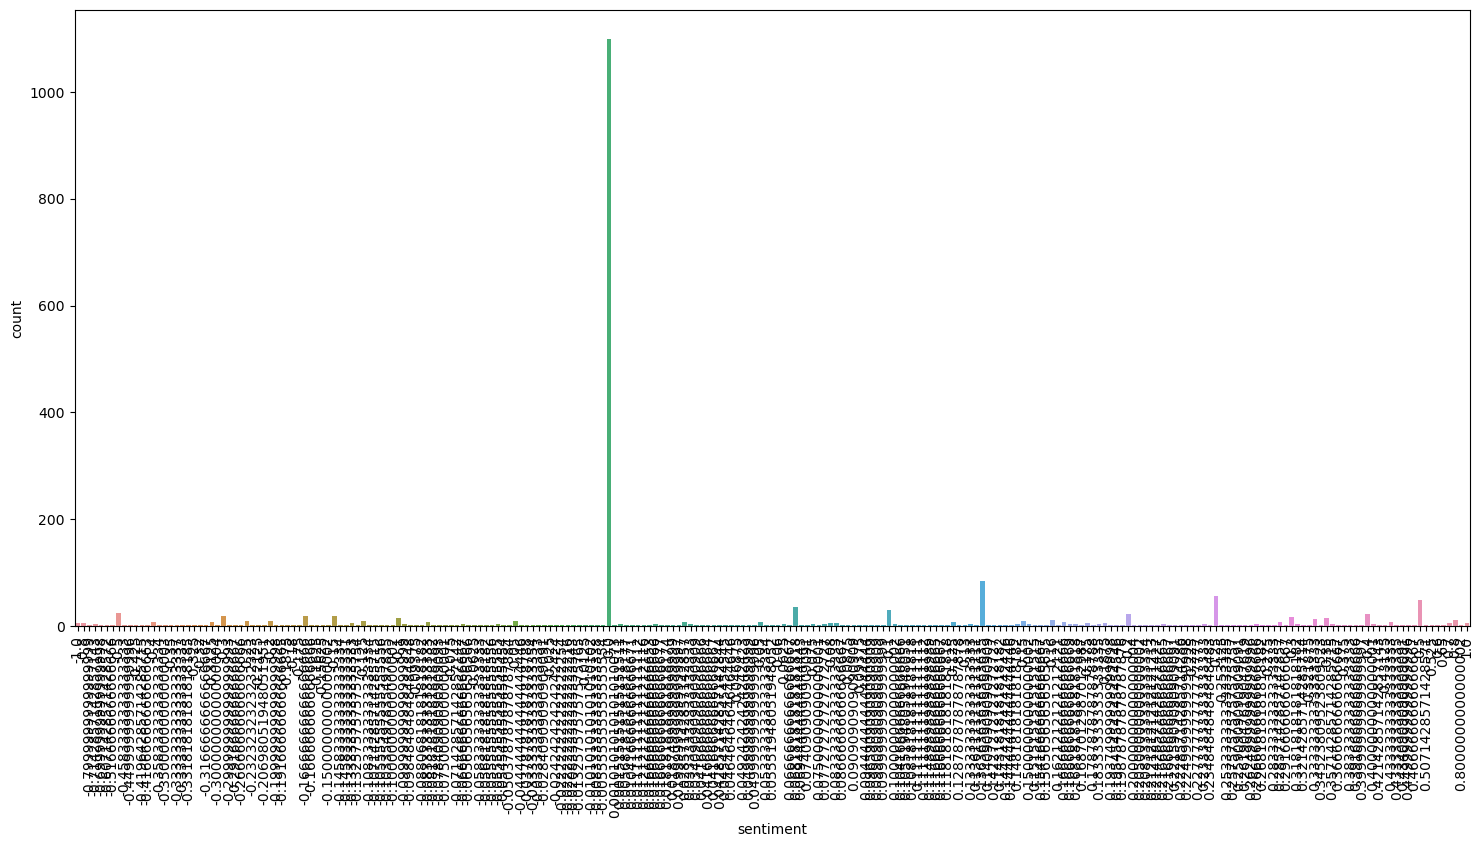

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
sns.countplot(x = df['sentiment'])
plt.xticks(rotation=90);

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [22]:
vect =  CountVectorizer()

In [23]:
# 0: notr 1: pozitif 2: negatif
def sntmnt(score):
    if score > 0.2:
        return 1
    elif  score <-0.2:
        return 2
    else :
        return 0

In [24]:
df['class'] = df['sentiment'].apply(sntmnt)

<Axes: xlabel='class', ylabel='count'>

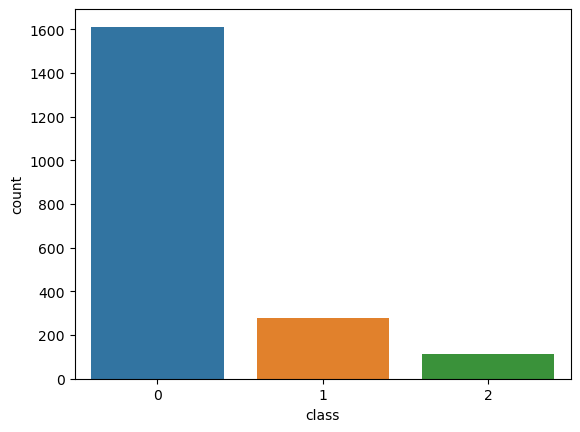

In [25]:
sns.countplot(x = df['class'])

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
d = DecisionTreeClassifier()

In [28]:
x = df['text']
y = df['class']

In [29]:
x = vect.fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size=0.2)

In [31]:
model = d.fit(x_train,y_train)

In [32]:
tahmin = model.predict(x_test)

In [33]:
accuracy_score(tahmin,y_test)

0.89

In [34]:
def algo_test(x,y):
    
    import numpy as np

    from scipy import stats
    import matplotlib.pyplot as plt
    %matplotlib inline 
    import seaborn as sns


    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
    from sklearn.tree import ExtraTreeClassifier
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor 

    from sklearn.model_selection import train_test_split

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import SGDClassifier

    import warnings
    warnings.filterwarnings('ignore')
    #plt.style.use('')

    
    G = GaussianNB()
    B = BernoulliNB()
    K = KNeighborsClassifier()
    L = LogisticRegression()
    D = DecisionTreeClassifier()
    S = SVC()
    SGD = SGDClassifier()

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)
    
    #algos = [G,B,K,L,D,S]
    algos = [G,B,K,L,D, SGD]
    
    #algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree","SVC" ]
    algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree", \
                  'Stochastic Gradient Descent' ]
    
    ASC = [];
    
    result =  result = pd.DataFrame(columns =['Accuracy_Score'], index = algo_names)
    
    i = 0;
    for algo in algos :
        
        algo.fit(x_train,y_train)
        print (accuracy_score(  y_test, algo.predict(x_test) ))
        ASC.append(  accuracy_score(  y_test, algo.predict(x_test) ) )
        
        print( "Confusion matrix: ",format(algo_names[i]) )
        i = i+1;
        print ( confusion_matrix(algo.predict(x_test),y_test) )
        
        #algo.fit(x,y)
        #print (accuracy_score(  y, algo.predict(x) ))
        #ASC.append(  accuracy_score(  y, algo.predict(x) ) )
    
    
    result.Accuracy_Score = ASC;

    return result.sort_values('Accuracy_Score', ascending=False)

In [35]:
algo_test(x.toarray(),y)

0.735
Confusion matrix:  Gaussian
[[271  36  14]
 [ 38  19   3]
 [ 14   1   4]]
0.805
Confusion matrix:  Bernoulli
[[322  56  21]
 [  1   0   0]
 [  0   0   0]]
0.8175
Confusion matrix:  K-Neighbors
[[323  53  20]
 [  0   3   0]
 [  0   0   1]]
0.8625
Confusion matrix:  Logistic Regression
[[314  29  17]
 [  7  27   0]
 [  2   0   4]]
0.865
Confusion matrix:  Decision Tree
[[293  12  11]
 [ 20  44   1]
 [ 10   0   9]]
0.855
Confusion matrix:  Stochastic Gradient Descent
[[300  21  10]
 [ 14  32   1]
 [  9   3  10]]


,Accuracy_Score
Decision Tree,0.8650
Logistic Regression,0.8625
Stochastic Gradient Descent,0.8550
K-Neighbors,0.8175
Bernoulli,0.8050
Gaussian,0.7350
